# Train test

Daten werden aufgeteilt
z.B.
   1) 3/4 Daten für Training
   2) 1/4 Daten zum Testen
-> Performance vom Modell abschätzen

Daten müssen gleichmäßig aufgteilt werden   : 11,12,13,91,91,92
Schlecht :
    1) Train 11,12,13
    1) Test 91,92

-> Rnd i.d.R. am besten

In [1]:
import pandas as pd #import pandas libary (working with csv file)

csvdata = pd.read_csv("autos_prepared.csv") # pd.read_excel("filename.xlsx") // pd.read_csv("filename.csv", sep=";")

In [2]:
csvdata.head()

,price,yearOfRegistration,powerPS,kilometer,model,fuelType,name
0,1450,1997,75,90000,andere,benzin,Toyota_Toyota_Starlet_1._Hand__TÜV_neu
1,13100,2005,280,5000,golf,benzin,R32_tauschen_oder_kaufen
2,4500,2008,87,90000,yaris,benzin,Toyota_Yaris_1.3_VVT_i
3,6000,2009,177,125000,3er,diesel,320_Alpinweiss_Kohlenstoff
4,3990,1999,118,90000,3er,benzin,BMW_318i_E46_+++_1._Hand_+++_Liebhaberfahrzeug


In [3]:
from sklearn.model_selection import train_test_split    # libary -> zum daten aufsplitten

X = csvdata[["kilometer"]].values    # safe only values (without header = second [])
Y = csvdata[["price"]].values   # numpy array

# audfteilung der werte X,Y auf deklaration //  random_state = rnd aufteilen // test_size = prozentualer anteil für test daten
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 0, test_size = 0.25)

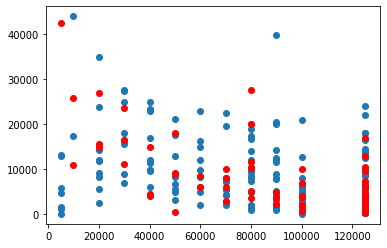

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train)   # scatter plot (Punktediagramm)
plt.scatter(X_test, y_test, color = "red")  # scatter plot (Punktediagramm)
plt.show()
#blau = testdaten   //  rot = trainingsdaten


In [5]:
from sklearn.linear_model import LinearRegression   # libary -> machine learning tools

model = LinearRegression()  # select "Lineales Regressionsmodell"
model.fit(X_train, y_train)  # model den daten anpassen

print("Intercept: " + str(model.intercept_))    # Parameter für Geradengleichung (Konstante)
print("Coef: " + str(model.coef_))  # Parameter für Geradengleichung (Koeffizient)

Intercept: [14971.46689814]
Coef: [[-0.07581664]]


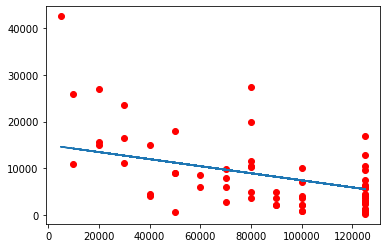

In [6]:
%matplotlib inline
# Command above: generate graphics in actual notebook
import matplotlib.pyplot as plt # generate graphics

predicted = model.predict(X_test)   ## testdaten als predicted

plt.scatter(X_test, y_test, color = "red")  # scatter plot (Punktediagramm)
plt.plot(X_test, predicted)     # x = test daten //  y = vorhergesagten werte daten
plt.show()

#blaue linie auf basis der blauen punkte
#modell hat roten punkte nie gesehen und siehe result: